# Jupyter notebook sample

In [25]:
import csv

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ray
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


### Import data

# Read data from a csv file

In [26]:
# Defining data for the dataframe

#ray.init()

df = pd.read_csv('data/BCCC-CIRA-CIC-DoHBrw-2020.csv', na_values=['NA'])

df.describe()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,1.246052,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.713803,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,-5.265523,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.627988,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,1.224949,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.716577,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


### Data visualization



In [27]:
# Plotting data
# add spaces to the column names before Capital letters
# def add_space(s):
#     a = s[0]
#     for i in s[1:]:
#         if i.isupper():
#             a += ' '
#         a += i
#     return a
# 
# df.columns = [add_space(i.replace(' ', '')) for i in df.columns]

# g = sb.PairGrid(df.iloc[:100, :], hue="Label")
# g.map_diag(plt.hist)
# g.map_offdiag(plt.scatter)
# g.add_legend()

# d = {}
# def func(x, **kwargs):
#     b = plt.gca()
# 
#     if not b in d.keys():
#         d[b] = {"data" : [], "color" : []}
#     d[b]["data"].append(x)
#     d[b]["color"].append(kwargs.get("color"))
# 
# g.map_diag(func)
# for ax, dic in d.items():
#     ax.hist(dic["data"], color=dic["color"], histtype="barstacked")
# 
# for ax in g.axes.flatten():
#     # rotate x axis labels
#     ax.set_xlabel(ax.get_xlabel(), rotation = 90)
#     # rotate y axis labels
#     ax.set_ylabel(ax.get_ylabel(), rotation = 0)
#     # set y labels alignment
#     ax.yaxis.get_label().set_horizontalalignment('right')
# 
# plt.show()

In [28]:
df

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,Benign
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,Malicious
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,Malicious
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,Benign
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499101,4865,144.950072,7622,227.093412,216676.627229,465.485367,231.240741,149.5,68,0.526810,...,1.916871,6.745692e-05,0.008213,0.009261,0.012254,0.000003,-1.093069,1.127264,0.886816,Malicious
499102,1807,53.007877,4895,143.593558,141408.773333,376.043579,223.400000,76.0,68,1.175928,...,1.629455,5.509494e-05,0.007423,0.010499,0.015296,0.000021,-1.938720,1.411665,0.706966,Malicious
499103,1738,51.137163,4761,140.082874,322424.727023,567.824557,240.703704,76.0,68,0.870183,...,1.515189,5.126219e-05,0.007160,0.012407,0.016293,0.000011,-1.628476,1.731273,0.577098,Malicious
499104,353,85.910364,393,95.645250,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534526,2.246325e-09,0.000047,0.000051,0.000018,0.000017,2.089574,0.717636,0.921984,Benign


In [34]:
# convert co

X = df.drop('Label', axis=1)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

pca = PCA(n_components=9)
pca.fit(scaled_data)

plt.figure(figsize=(8, 6))

pca_data = pca.transform(scaled_data)

pca_df = pd.DataFrame(pca_data, columns=[f"PC{i}" for i in range(1, pca_data.shape[1] + 1)])

data = pd.concat([pca_df, df['Label']], axis=1)

#sb.scatterplot(data=data, x='PC1', y='PC2', hue='Label')

data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Label
0,0.285085,-1.249350,-0.759257,1.888085,-1.590036,0.336527,0.273810,-1.395804,-0.656521,Benign
1,-2.273445,0.500420,0.593572,-0.998189,0.485258,0.288814,-0.284145,-0.544298,0.133785,Malicious
2,0.073346,0.110297,-0.400756,0.504221,-0.519807,0.305448,-0.247253,-0.087341,0.297351,Malicious
3,-1.385342,1.301977,7.229436,5.777777,4.153107,7.815305,-1.993912,5.096189,1.106642,Benign
4,4.752019,1.753858,-0.100404,-3.372315,-0.304409,1.686262,1.517774,0.127169,-0.515014,Benign
...,...,...,...,...,...,...,...,...,...,...
499101,-2.548642,0.895743,0.371247,-1.274198,0.582710,0.000490,-0.338726,0.329656,1.434714,Malicious
499102,-2.257067,0.417569,0.575092,-1.020603,0.533299,0.304005,-0.365088,-0.530440,0.152896,Malicious
499103,-3.135720,0.992445,1.009003,-1.335718,0.513383,-0.253135,0.080876,0.272534,-0.242866,Malicious
499104,0.278261,-1.245500,-0.762363,1.898707,-1.591484,0.334810,0.267514,-1.398522,-0.648077,Benign


<Figure size 800x600 with 0 Axes>

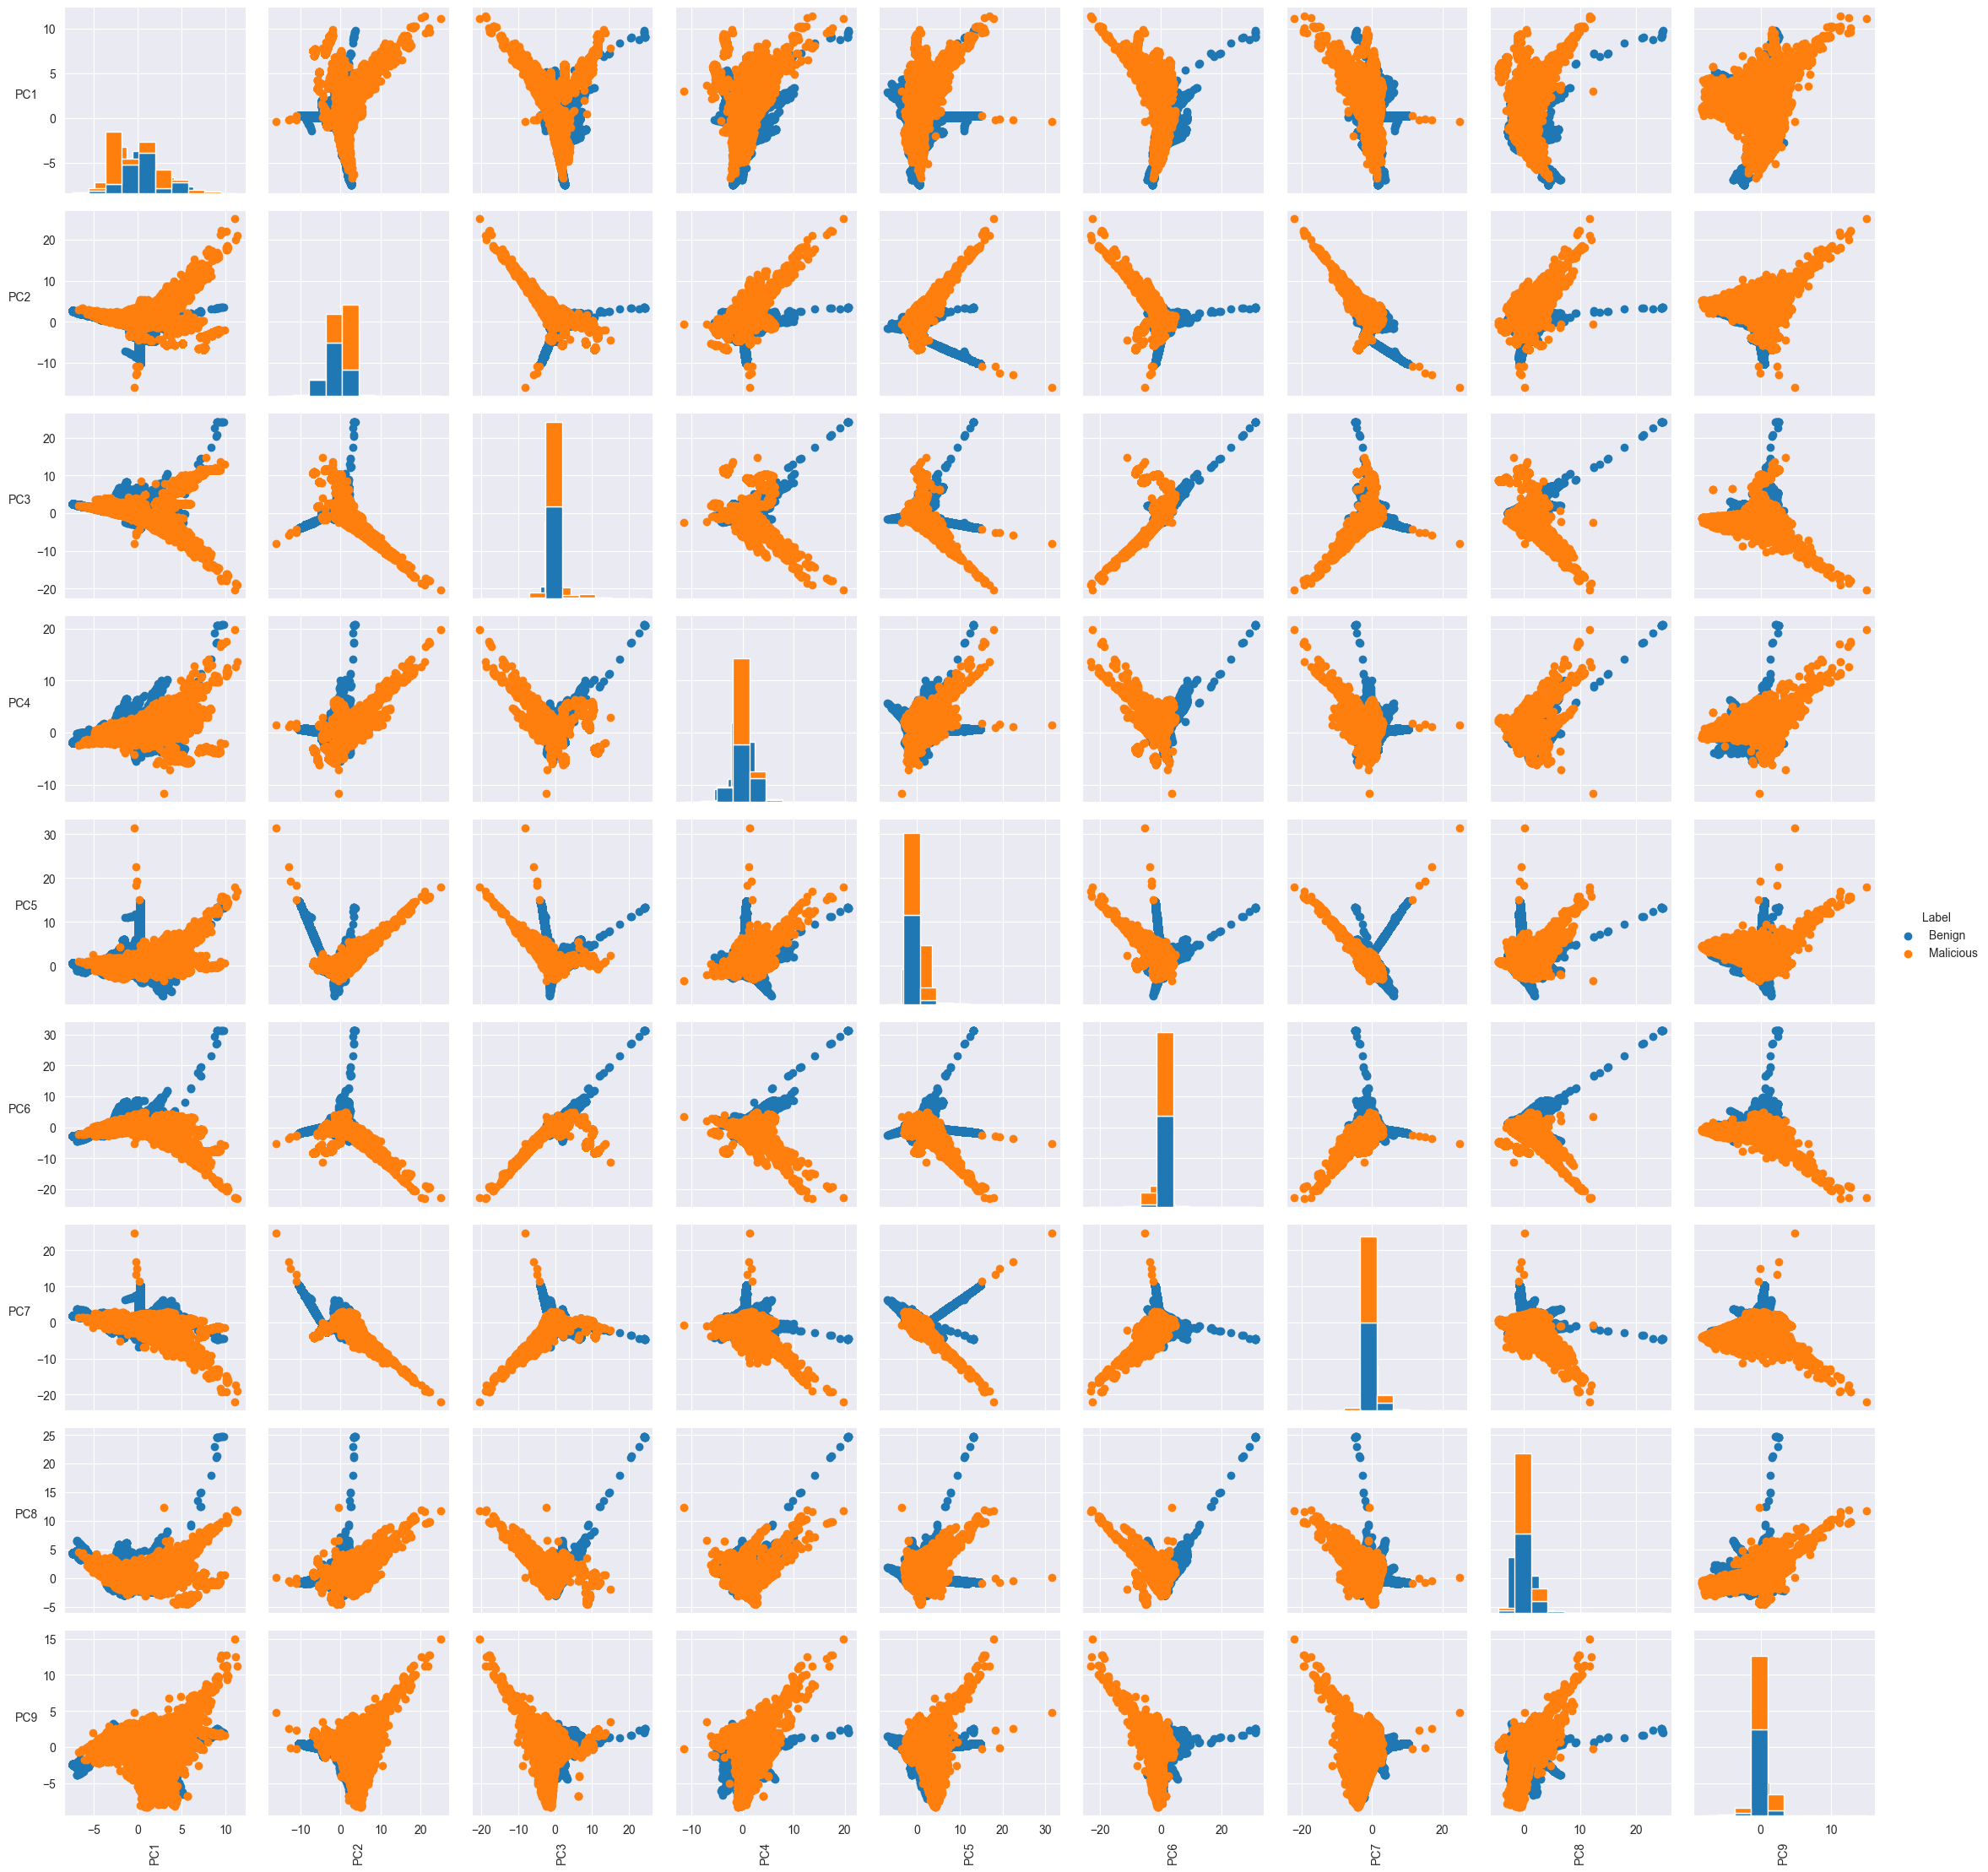

In [36]:
g = sb.PairGrid(data.iloc[:1000][:], hue="Label")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

d = {}
def func(x, **kwargs):
    b = plt.gca()

    if not b in d.keys():
        d[b] = {"data" : [], "color" : []}
    d[b]["data"].append(x)
    d[b]["color"].append(kwargs.get("color"))

g.map_diag(func)
for ax, dic in d.items():
    ax.hist(dic["data"], color=dic["color"], histtype="barstacked")

for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

plt.show()